In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as td

from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                  horizontal_flip=True, 
                                  zoom_range=0.3, 
                                  rotation_range=45, 
                                  width_shift_range=0.15, 
                                  height_shift_range=0.15)

test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = train_datagen.flow_from_directory('dataset/train', 
                                                   target_size=(99, 99), 
                                                   seed=55, 
                                                   class_mode='binary')

valid_generator = test_datagen.flow_from_directory('dataset/valid', 
                                                   target_size=(99, 99), 
                                                   shuffle=False, 
                                                   class_mode='binary')

test_generator = test_datagen.flow_from_directory('dataset/test', 
                                                   target_size=(99, 99), 
                                                   shuffle=False, 
                                                   class_mode='binary')

Found 5655 images belonging to 2 classes.
Found 1884 images belonging to 2 classes.
Found 1884 images belonging to 2 classes.


In [4]:
def plotImages(images_arr, labels):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, label, ax in zip(images_arr, labels, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title("Positive" if label else "Negative")
    plt.tight_layout()
    plt.show()

In [5]:
sample_images, _ = next(train_generator)

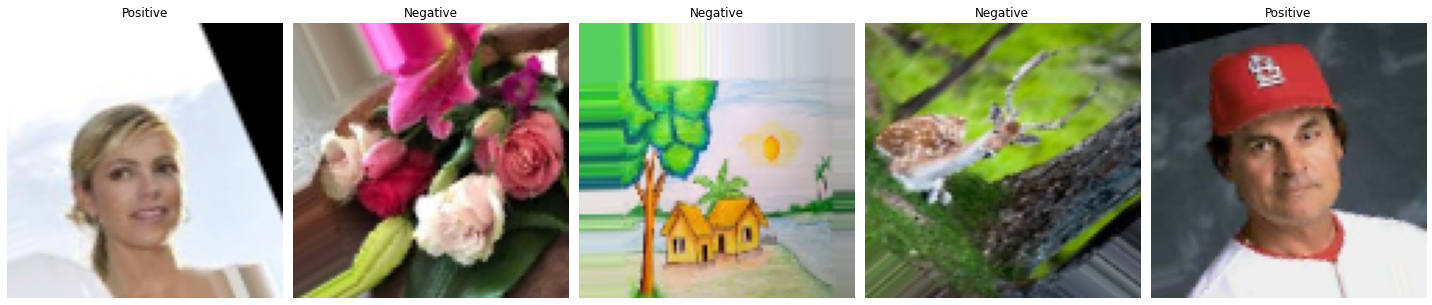

In [6]:
plotImages(sample_images[25:30], _[25:30])

In [7]:
sample_images.shape

(32, 99, 99, 3)

In [8]:
alexnet = Sequential()

alexnet.add(Conv2D(96, 11, strides=4, activation='relu', input_shape=(99, 99, 3)))
alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=2))
alexnet.add(Conv2D(256, 5, padding='same', activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=2))
alexnet.add(Conv2D(384, 3, padding='same', activation='relu'))
alexnet.add(Conv2D(384, 3, padding='same', activation='relu'))
alexnet.add(Conv2D(256, 3, padding='same', activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=2))
alexnet.add(Flatten())
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(2, activation='softmax'))

In [9]:
alexnet.compile(loss='sparse_categorical_crossentropy', 
               optimizer='adam', 
               metrics='accuracy')

In [10]:
alexnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 23, 23, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 256)         8

In [11]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("alexnet.h5", save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoint_cb]

history = alexnet.fit(train_generator, 
                     epochs=1000, 
                     validation_data = valid_generator, 
                     callbacks=callbacks)

Epoch 1/1000
177/177 [==============================] - 175s 989ms/step - loss: 0.4563 - accuracy: 0.7836 - val_loss: 0.2114 - val_accuracy: 0.9103
Epoch 2/1000
177/177 [==============================] - 180s 1s/step - loss: 0.2674 - accuracy: 0.8927 - val_loss: 0.1689 - val_accuracy: 0.9406
Epoch 3/1000
177/177 [==============================] - 185s 1s/step - loss: 0.1889 - accuracy: 0.9275 - val_loss: 0.1312 - val_accuracy: 0.9485
Epoch 4/1000
177/177 [==============================] - 179s 1s/step - loss: 0.1733 - accuracy: 0.9344 - val_loss: 0.0998 - val_accuracy: 0.9650
Epoch 5/1000
177/177 [==============================] - 177s 998ms/step - loss: 0.1625 - accuracy: 0.9431 - val_loss: 0.1446 - val_accuracy: 0.9368
Epoch 6/1000
177/177 [==============================] - 176s 997ms/step - loss: 0.1529 - accuracy: 0.9461 - val_loss: 0.1255 - val_accuracy: 0.9517
Epoch 7/1000
177/177 [==============================] - 175s 988ms/step - loss: 0.1447 - accuracy: 0.9469 - val_loss: 0.0

177/177 [==============================] - 173s 978ms/step - loss: 0.0947 - accuracy: 0.9676 - val_loss: 0.0535 - val_accuracy: 0.9825
Epoch 57/1000
177/177 [==============================] - 173s 979ms/step - loss: 0.0774 - accuracy: 0.9721 - val_loss: 0.0380 - val_accuracy: 0.9857
Epoch 58/1000
177/177 [==============================] - 185s 1s/step - loss: 0.0635 - accuracy: 0.9760 - val_loss: 0.0419 - val_accuracy: 0.9846
Epoch 59/1000
177/177 [==============================] - 177s 1s/step - loss: 0.0697 - accuracy: 0.9760 - val_loss: 0.0408 - val_accuracy: 0.9867
Epoch 60/1000
177/177 [==============================] - 180s 1s/step - loss: 0.0575 - accuracy: 0.9795 - val_loss: 0.0546 - val_accuracy: 0.9835
Epoch 61/1000
177/177 [==============================] - 179s 1s/step - loss: 0.1018 - accuracy: 0.9639 - val_loss: 0.0383 - val_accuracy: 0.9857
Epoch 62/1000
177/177 [==============================] - 177s 1s/step - loss: 0.0705 - accuracy: 0.9742 - val_loss: 0.1101 - val_acc

In [12]:
alexnet = keras.models.load_model("alexnet.h5")

In [13]:
alexnet.evaluate(train_generator)

177/177 [==============================] - 53s 299ms/step - loss: 0.0511 - accuracy: 0.9820


[0.05109531804919243, 0.9819628596305847]

In [14]:
alexnet.evaluate(valid_generator)

59/59 [==============================] - 16s 274ms/step - loss: 0.0311 - accuracy: 0.9894


[0.031066473573446274, 0.9893842935562134]

In [15]:
alexnet.evaluate(test_generator)

23/59 [==========>...................] - ETA: 9s - loss: 0.0311 - accuracy: 0.9878 

UnknownError:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f3d8466cb80>
Traceback (most recent call last):

  File "/home/trojan/.local/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 243, in __call__
    ret = func(*args)

  File "/home/trojan/.local/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 309, in wrapper
    return func(*args, **kwargs)

  File "/home/trojan/.local/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 785, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/trojan/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 801, in wrapped_generator
    for data in generator_fn():

  File "/home/trojan/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 932, in generator_fn
    yield x[i]

  File "/home/trojan/.local/lib/python3.8/site-packages/keras_preprocessing/image/iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/home/trojan/.local/lib/python3.8/site-packages/keras_preprocessing/image/iterator.py", line 227, in _get_batches_of_transformed_samples
    img = load_img(filepaths[j],

  File "/home/trojan/.local/lib/python3.8/site-packages/keras_preprocessing/image/utils.py", line 114, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "/usr/lib/python3/dist-packages/PIL/Image.py", line 2861, in open
    raise UnidentifiedImageError(

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f3d8466cb80>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_test_function_47492]

Function call stack:
test_function


In [61]:
test = []
test.append(plt.imread("my_test/1.jpg"))
test.append(plt.imread("my_test/2.jpg"))
test.append(plt.imread("my_test/3.jpg"))
test.append(plt.imread("my_test/4.jpg"))
test.append(plt.imread("my_test/5.jpg"))

In [62]:
test = np.array(test)

In [63]:
test = test/255.

In [64]:
pred = np.argmax(alexnet.predict(test), axis=1)

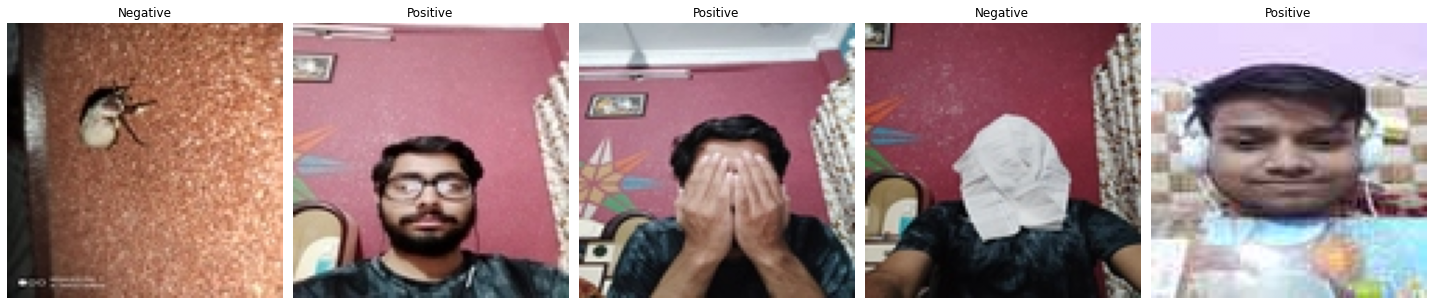

In [65]:
plotImages(test, pred)

In [66]:
alexnet.predict(test)

array([[9.0221012e-01, 9.7789876e-02],
       [8.0191521e-03, 9.9198091e-01],
       [1.5859319e-03, 9.9841404e-01],
       [7.2048116e-01, 2.7951881e-01],
       [1.5237107e-05, 9.9998474e-01]], dtype=float32)